## Social Media Data in eo-learn

We'll load example twitter data as georeferenced vector points and aggregate them into a raster layer for further analysis

In [1]:
%matplotlib inline

In [2]:
import geopandas as gpd
from matplotlib import pyplot as plt
from rasterio.enums import MergeAlg

from eolearn.geometry import VectorToRaster
from eolearn.io import S2L2AWCSInput
from eolearn.core import EOPatch, FeatureType
from sentinelhub import BBox, CRS

In [3]:
# read in Paris example twitter data
tweets = gpd.read_file('twitter_data.geojson')

In [4]:
# use a single patch for demonstration purposes
patch = EOPatch(
    bbox=BBox([2.2445, 48.8185, 2.4032, 48.9002], crs=CRS.WGS84)
)

In [5]:
# when rasterizing our data, count each tweet (values=1)
# and sum them in each pixel (merge_alg=MergeAlg.add)
vtr = VectorToRaster(
    tweets,
    (FeatureType.DATA_TIMELESS, 'tweet_density'),
    values=1,
    raster_resolution=250,
    merge_alg=MergeAlg.add
)

# add sentinel satellite imagery for comparison
s2 = S2L2AWCSInput(layer='TRUE-COLOR-S2-L2A', resx='10m', resy='10m', maxcc=0.1)

In [6]:
vtr.execute(patch)
s2.execute(patch, time_interval=('2019-06-01', '2019-06-30'))

EOPatch(
  data: {
    TRUE-COLOR-S2-L2A: numpy.ndarray(shape=(1, 909, 1161, 3), dtype=float32)
  }
  mask: {
    IS_DATA: numpy.ndarray(shape=(1, 909, 1161, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {
    tweet_density: numpy.ndarray(shape=(36, 47, 1), dtype=uint8)
  }
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.1
    service_type: 'wcs'
    size_x: '10m'
    size_y: '10m'
    time_difference: datetime.timedelta(days=-1, seconds=86399)
    time_interval: ('2019-06-01', '2019-06-30')
  }
  bbox: BBox(((2.2445, 48.8185), (2.4032, 48.9002)), crs=EPSG:4326)
  timestamp: [datetime.datetime(2019, 6, 28, 11, 7, 29)]
)

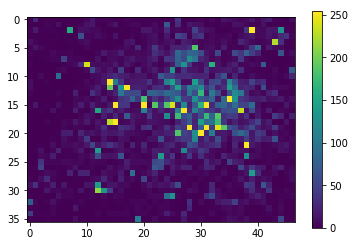

In [7]:
# view our tweet density (change the resolution of the "vtr" task to change the spatial aggregation size)
plt.imshow(patch.data_timeless['tweet_density'][:,:,0])
c = plt.colorbar()

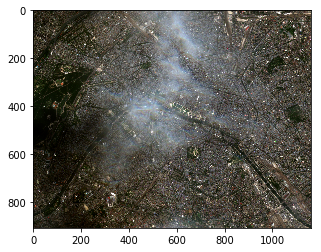

In [8]:
# compare this with the satellite data; this could potentially be used
# for population density modeling or other types of analyses
plt.imshow(patch.data['TRUE-COLOR-S2-L2A'][0])